<a href="https://colab.research.google.com/github/Syed-Irfan-1165/Yes-Bank-Stock-Closing-Price-Prediction/blob/master/Yes_Bank_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Summary

##Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.


## <b>Data Description </b>


1.   Date - Date of record
2.   Open - Opening Price
3.   High - Highest price in the day
4.   Low - Lowest price in the day
5.   Close - Occupations of the speaker

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [137]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# Importing csv file

YesBank_df = pd.read_csv(r"/content/drive/MyDrive/Linear Regression/data_YesBank_StockPrices.csv")

In [140]:
YesBank_df.head()

Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41

In [141]:
YesBank_df.tail()

Date   Open   High    Low  Close
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

In [142]:
YesBank_df.shape

(185, 5)

In [143]:
YesBank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [144]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [145]:
YesBank_df.describe()

Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000

# **Exploratory Data Analysis**

## **Handling Outliers**

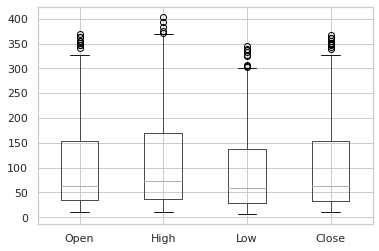

In [146]:
YesBank_df.boxplot()



##**Cleaning and Manipulating dataset**

In [147]:
YesBank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 12.5, 'Variables')

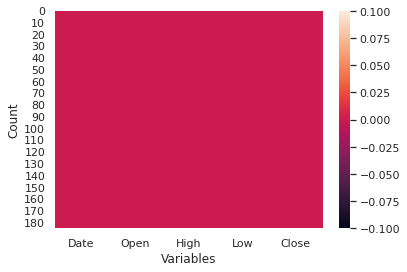

In [148]:
#plotting the heatmap for checking the null values
data = YesBank_df.isnull()
heat_map = sns.heatmap(data)
plt.ylabel('Count')
plt.xlabel('Variables')

In [149]:
duplicate = YesBank_df[YesBank_df.duplicated()]
print("Duplicate Values :")

Duplicate Values :


In [150]:
#Writing a define function to obtain variable, dtypes,count,unique,duplicate,missing values in a single dataframe
def show_missing(df):
   
    
    variables = []
    dtypes = []
    count = []
    unique = []
    duplicate = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        duplicate.append(df.duplicated().sum())
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'duplicate' : duplicate,
        'missing': missing, 
        
    })    
        
    return output

In [151]:
show_missing(YesBank_df).T

0        1        2        3        4
variable     Date     Open     High      Low    Close
dtype      object  float64  float64  float64  float64
count         185      185      185      185      185
unique        185      183      184      183      185
duplicate       0        0        0        0        0
missing         0        0        0        0        0

In [152]:
YesBank_df

Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]

In [153]:
# convert string object to datetime object

from datetime import datetime
YesBank_df['Date'] = YesBank_df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [154]:
# For better visualization let me create seperate columns for month,year from date

YesBank_df['Month'] = YesBank_df['Date'].apply(lambda x: x.strftime('%B')) 
YesBank_df['Year'] = YesBank_df['Date'].apply(lambda x: x.strftime('%Y')) 
YesBank_df['Day'] = pd.to_datetime(YesBank_df['Date']).dt.day_name()

In [155]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Month   185 non-null    object        
 6   Year    185 non-null    object        
 7   Day     185 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 11.7+ KB


In [156]:
YesBank_df

Date   Open   High    Low  Close      Month  Year        Day
0   2005-07-01  13.00  14.00  11.25  12.46       July  2005     Friday
1   2005-08-01  12.58  14.88  12.55  13.42     August  2005     Monday
2   2005-09-01  13.48  14.87  12.27  13.30  September  2005   Thursday
3   2005-10-01  13.20  14.47  12.40  12.99    October  2005   Saturday
4   2005-11-01  13.35  13.88  12.88  13.41   November  2005    Tuesday
..         ...    ...    ...    ...    ...        ...   ...        ...
180 2020-07-01  25.60  28.30  11.10  11.95       July  2020  Wednesday
181 2020-08-01  12.00  17.16  11.85  14.37     August  2020   Saturday
182 2020-09-01  14.30  15.34  12.75  13.15  September  2020    Tuesday
183 2020-10-01  13.30  14.01  12.11  12.42    October  2020   Thursday
184 2020-11-01  12.41  14.90  12.21  14.67   November  2020     Sunday

[185 rows x 8 columns]

##Data Visualization

Text(0.5, 6.799999999999979, 'Closing Price')

<Figure size 1080x720 with 0 Axes>

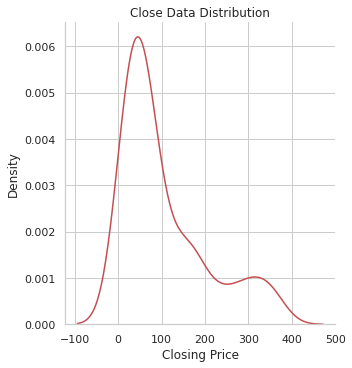

In [157]:
# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.displot(YesBank_df['Close'],color="r",kind ='kde')
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')

In [158]:
# visualise the data
import plotly.express as px

fig = px.strip(YesBank_df, YesBank_df['Month'], YesBank_df['Close'],title='Monthly closing price')
autosize=False,
width=1400,
height=400
fig.show()
     

In [159]:
fig = px.bar(YesBank_df, YesBank_df['Year'], YesBank_df['Close'], title='Yearly closing price')
autosize=False,
width=1400,
height=400
fig.show()

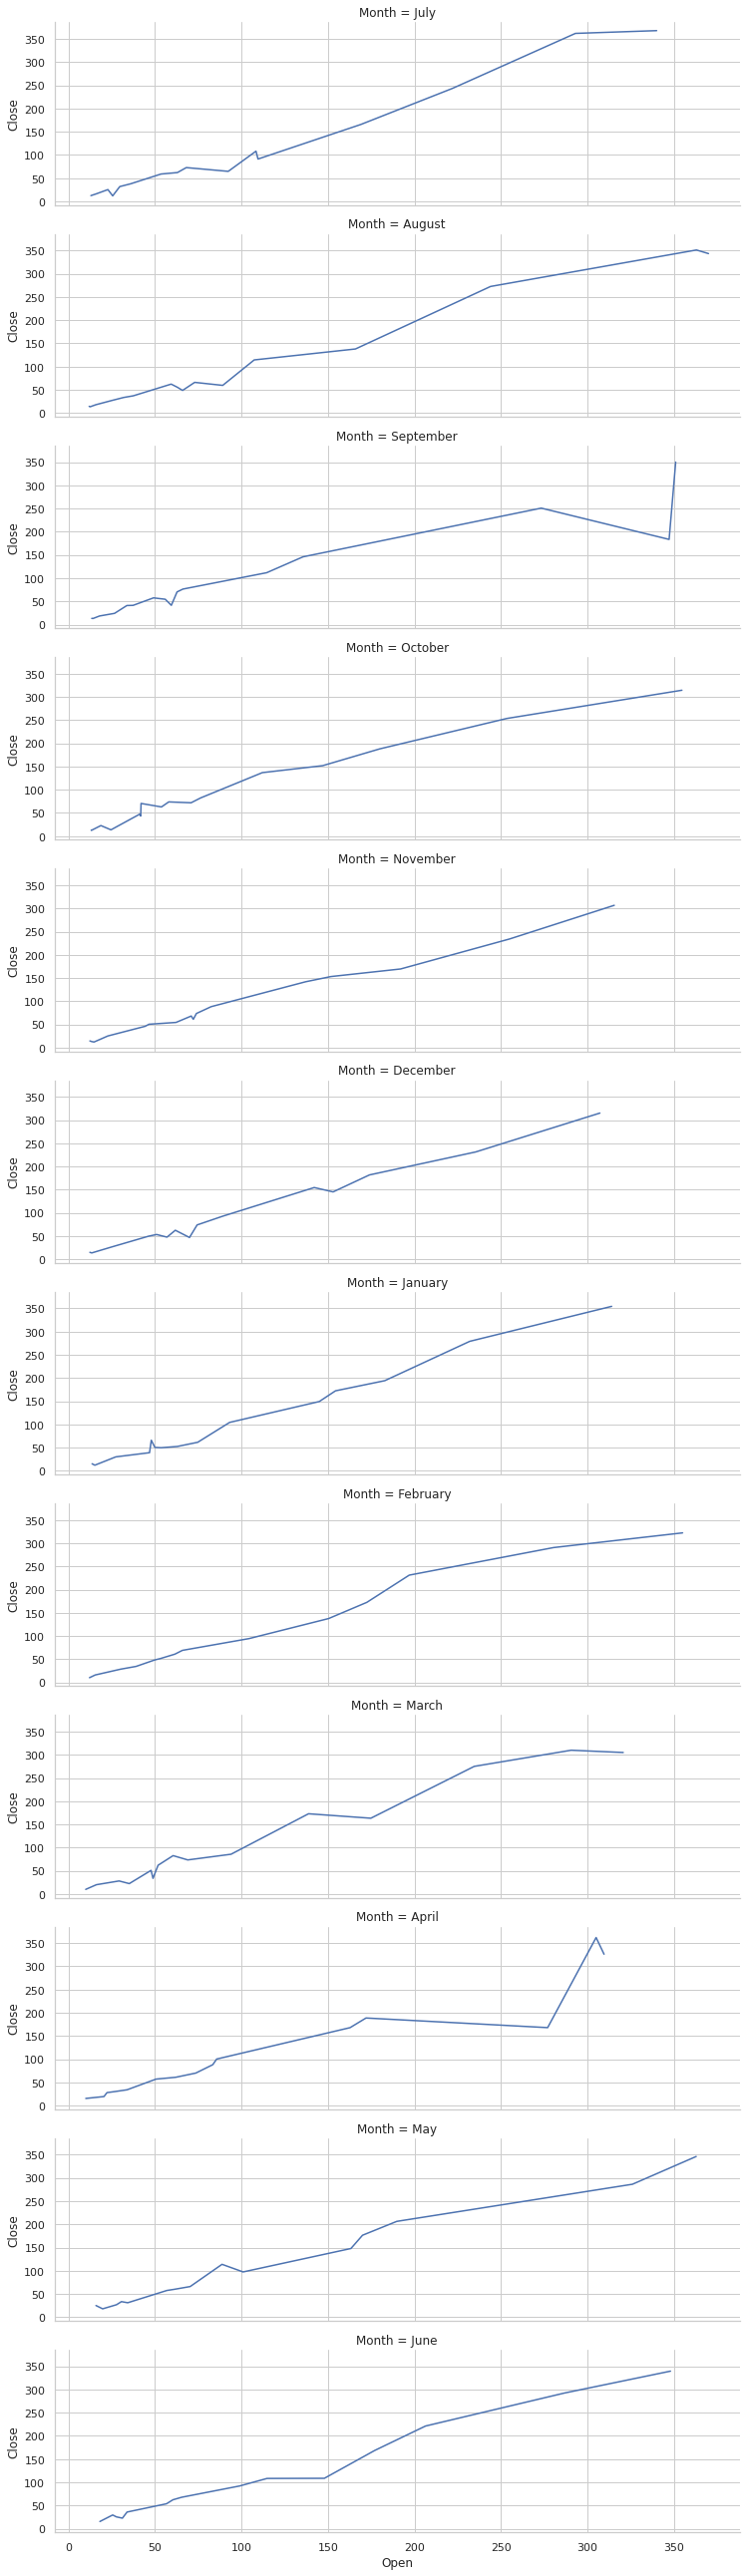

In [160]:
sns.relplot(data=YesBank_df, x="Open", y="Close",
    row="Month",
    height=3, aspect=3.5,
    kind="line"
)

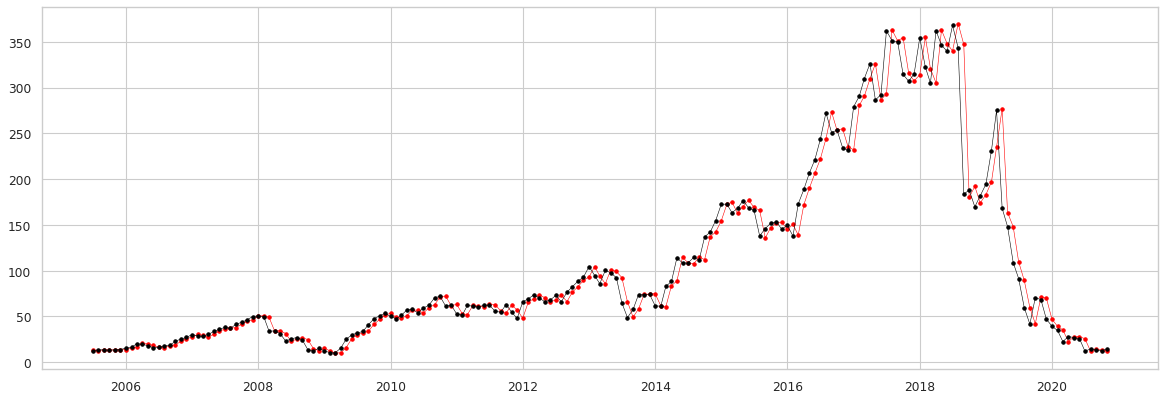

In [161]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'Open', data=YesBank_df, marker='.', color='red', linewidth=0.5)
plt.plot( 'Date', 'Close', data=YesBank_df, marker='.', color='black', linewidth=0.5)


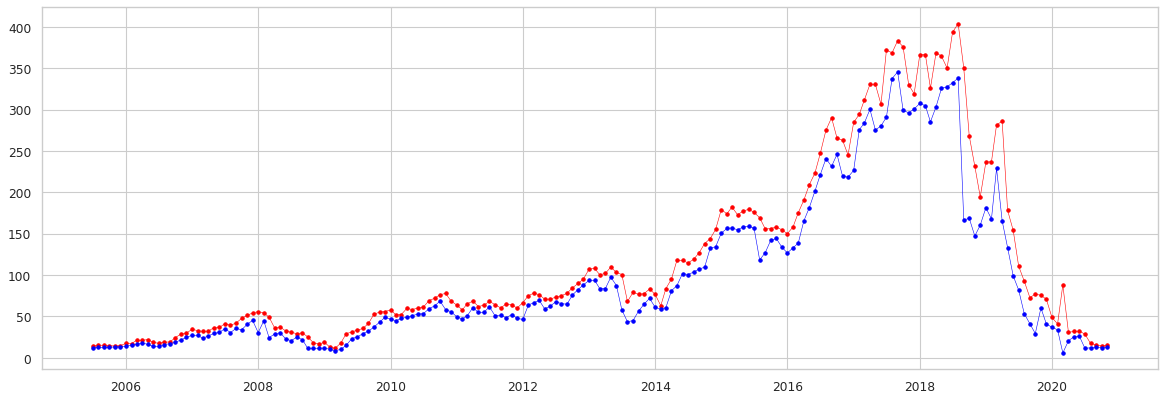

In [162]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'High', data=YesBank_df, marker='.', color='red', linewidth=0.5)
plt.plot( 'Date', 'Low', data=YesBank_df, marker='.', color='blue', linewidth=0.5)

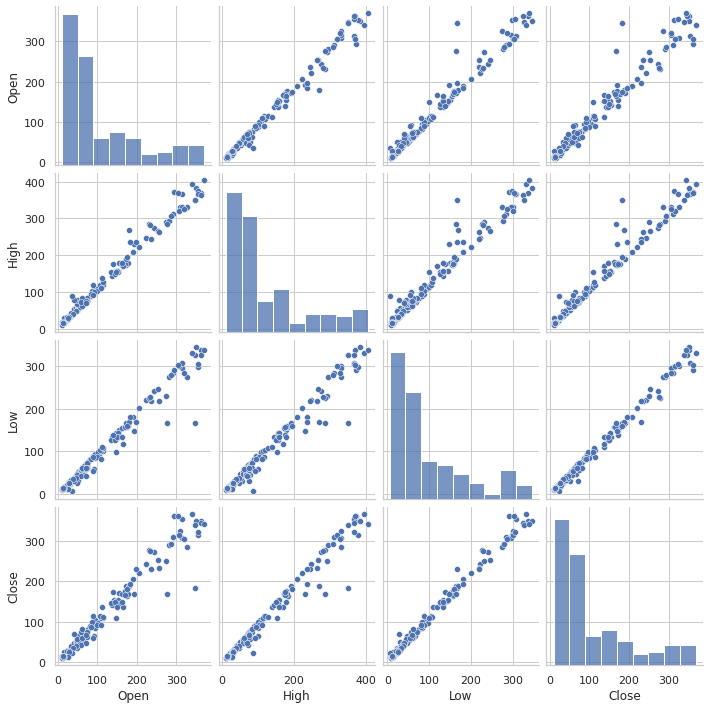

In [163]:
cols = ['Open', 'High', 'Low', 'Close',]
sns.pairplot(YesBank_df[cols], height = 2.5)

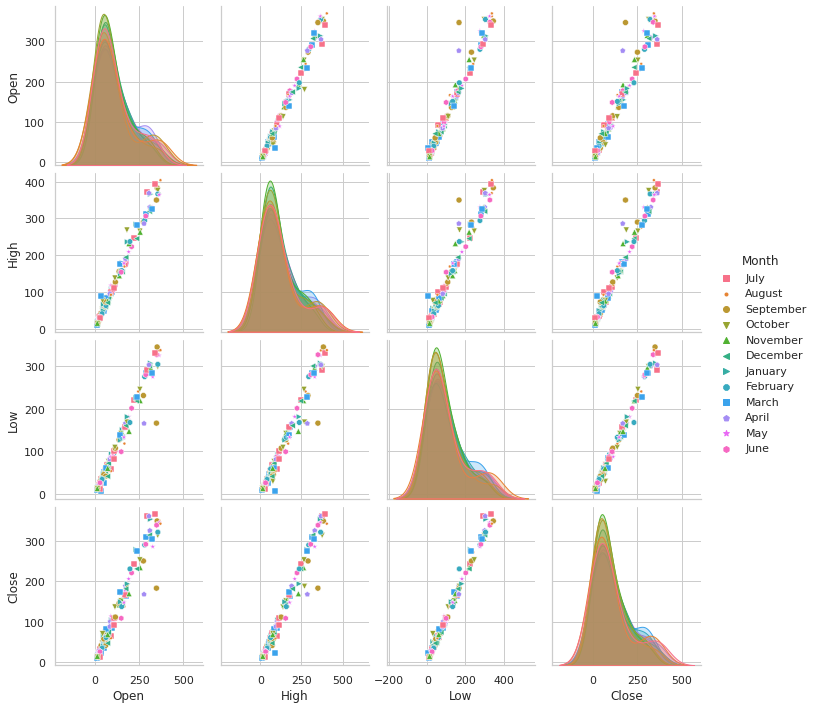

In [164]:
sns.pairplot(YesBank_df, hue="Month",markers=[',', '.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h'])

In [165]:
YesBank_df.skew(axis = 1, skipna = True)

<ipython-input-165-9e4256bf65e3>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0     -0.253807
1      1.296154
2      0.495575
3      1.088047
4      0.000000
         ...   
180    0.069940
181    0.961512
182    0.535863
183    0.441802
184    0.005410
Length: 185, dtype: float64

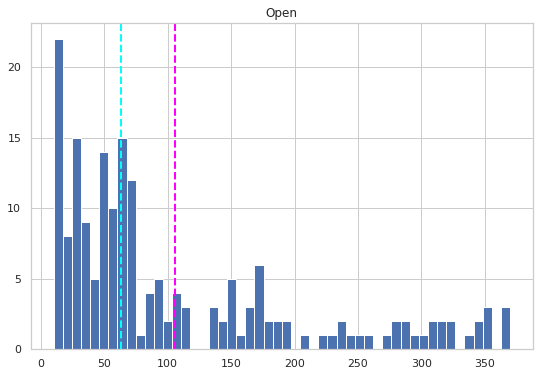

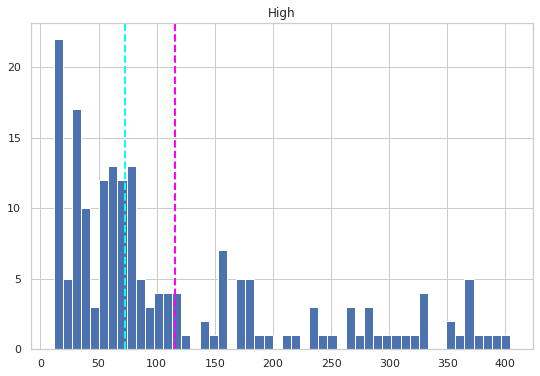

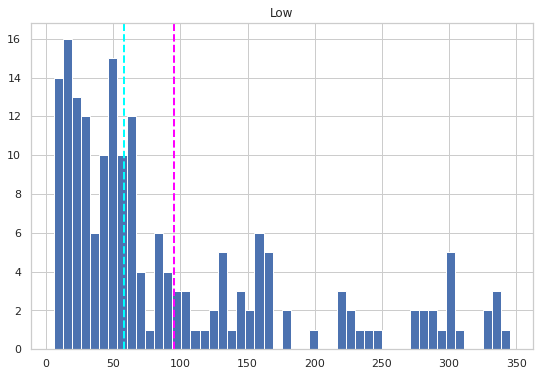

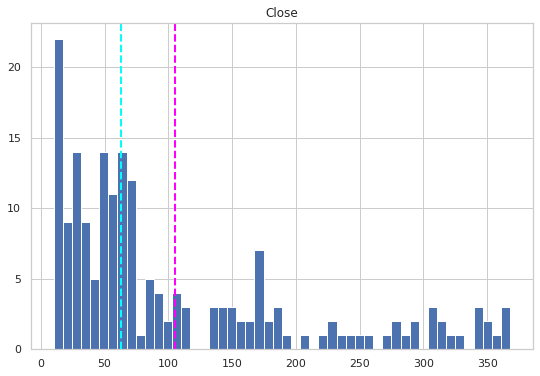

In [166]:
# Check for skewness in the dataset

numeric_features = YesBank_df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YesBank_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [167]:
#Plotting Open vs Close vs High 3d plot for better visualization

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(YesBank_df, x='Date', y='Open', z='Close',
              color='High')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


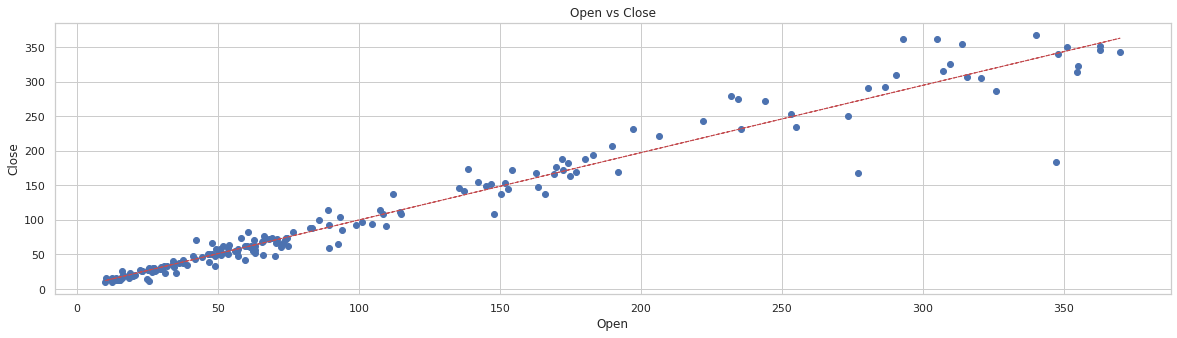

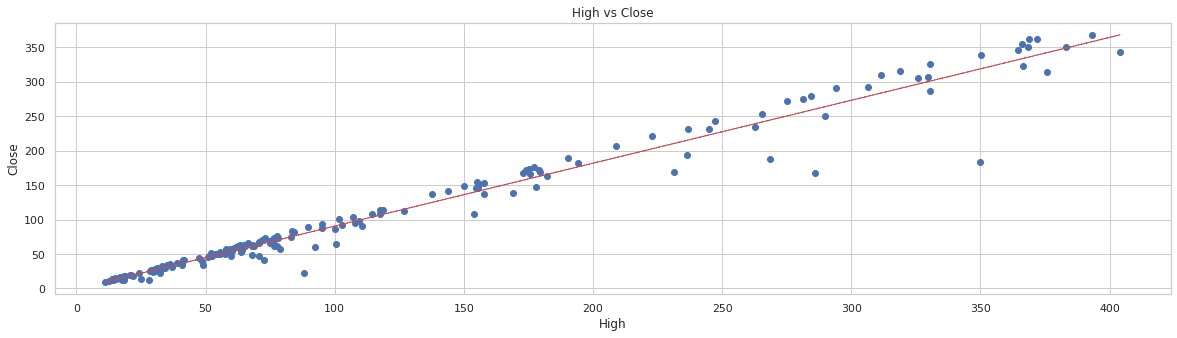

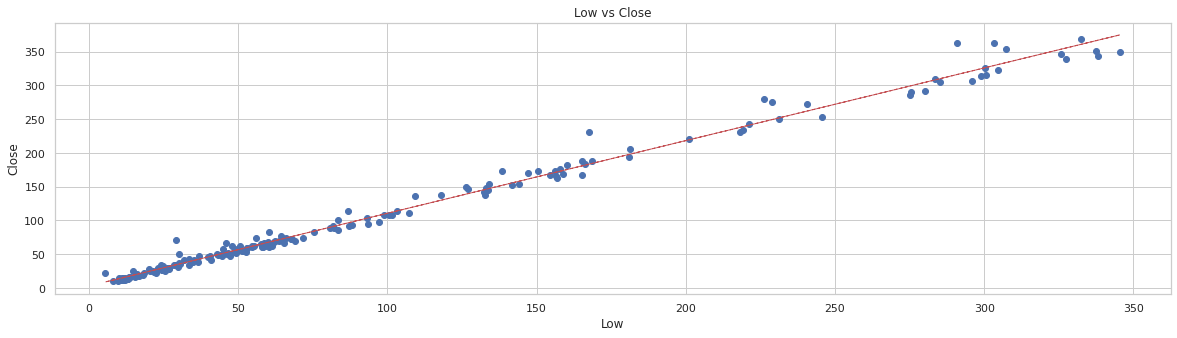

In [168]:
# scatter plot to see the relationship between dependent & independent variables
for col in YesBank_df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(YesBank_df[col], YesBank_df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(YesBank_df[col], YesBank_df['Close'], 1)
  y_hat = np.poly1d(z)(YesBank_df[col])
  plt.plot(YesBank_df[col], y_hat, "r--", lw=1)
  plt.show()

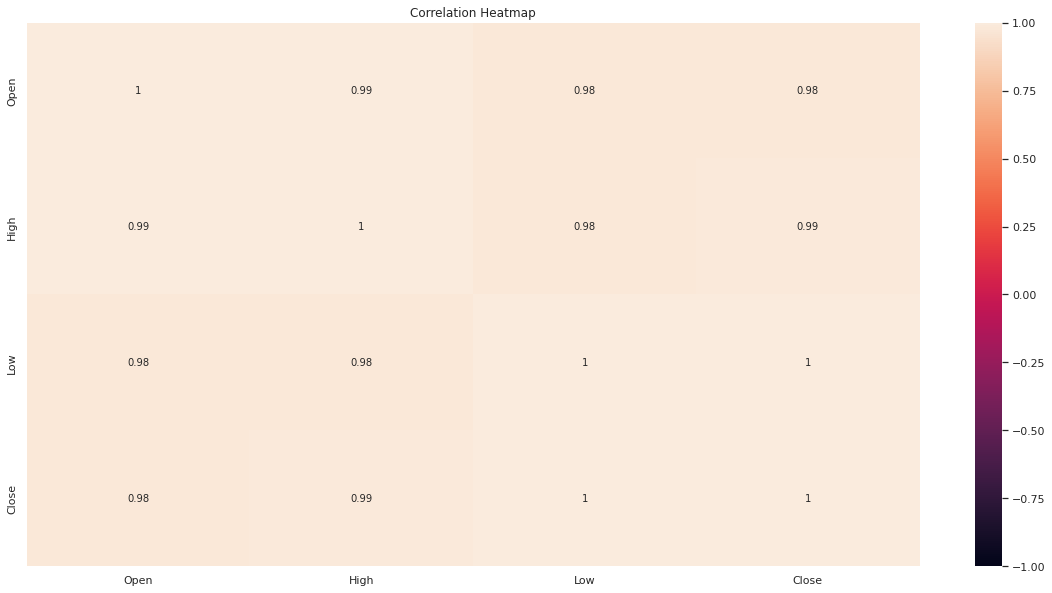

In [169]:

# check for existence of corelation
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap')
cor = sns.heatmap(YesBank_df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

##**Feature Engineering**

In [170]:
#Adding a new feature for comaparing old features from the new feature that is the avg of Open and Close

YesBank_df['OC'] = YesBank_df[['Open', 'Close',]].mean(axis=1).round(2)
YesBank_df['LH'] = YesBank_df[['Low', 'High',]].mean(axis=1).round(2)


In [171]:
YesBank_df.head()

Date   Open   High    Low  Close      Month  Year       Day     OC  \
0 2005-07-01  13.00  14.00  11.25  12.46       July  2005    Friday  12.73   
1 2005-08-01  12.58  14.88  12.55  13.42     August  2005    Monday  13.00   
2 2005-09-01  13.48  14.87  12.27  13.30  September  2005  Thursday  13.39   
3 2005-10-01  13.20  14.47  12.40  12.99    October  2005  Saturday  13.10   
4 2005-11-01  13.35  13.88  12.88  13.41   November  2005   Tuesday  13.38   

      LH  
0  12.62  
1  13.72  
2  13.57  
3  13.44  
4  13.38

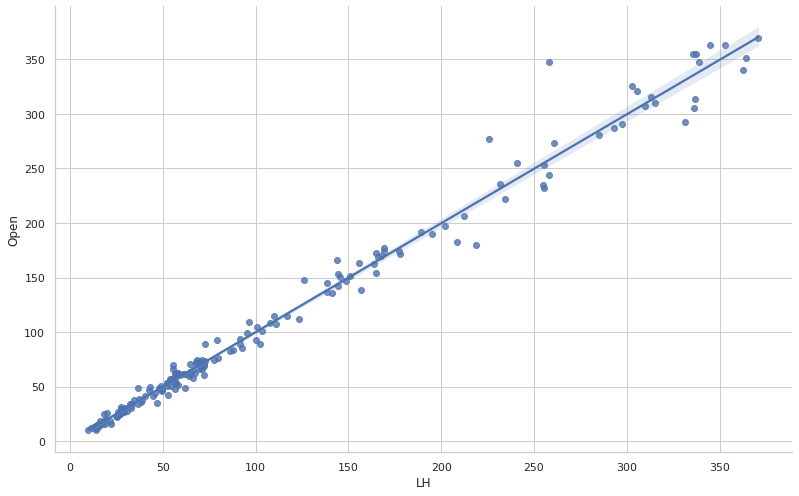

<Figure size 1440x360 with 0 Axes>

In [172]:

sns.lmplot(x = "LH",
            y = "Open", 
           height=7, aspect=1.6,
            data = YesBank_df)
fig = plt.figure(figsize=(20,5))
sns.set(style="white", color_codes=True)

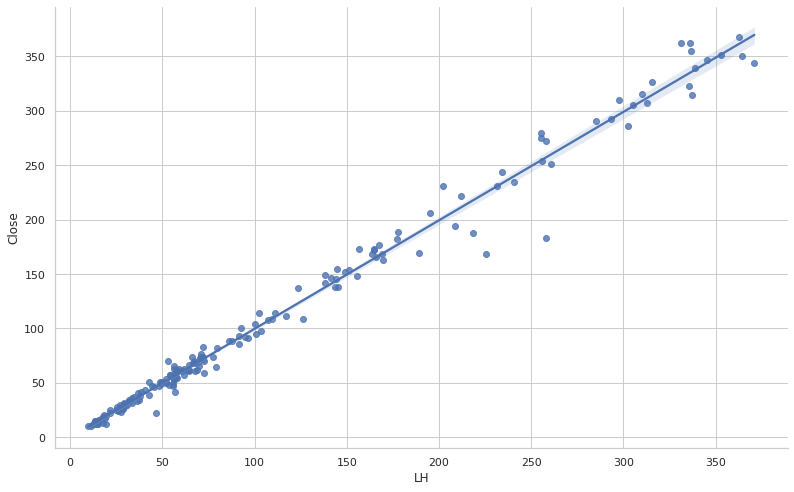

In [173]:
sns.set(style="whitegrid", color_codes=True)
sns.lmplot(x = "LH",
            y = "Close", 
           height=7, aspect=1.6,
            data = YesBank_df)

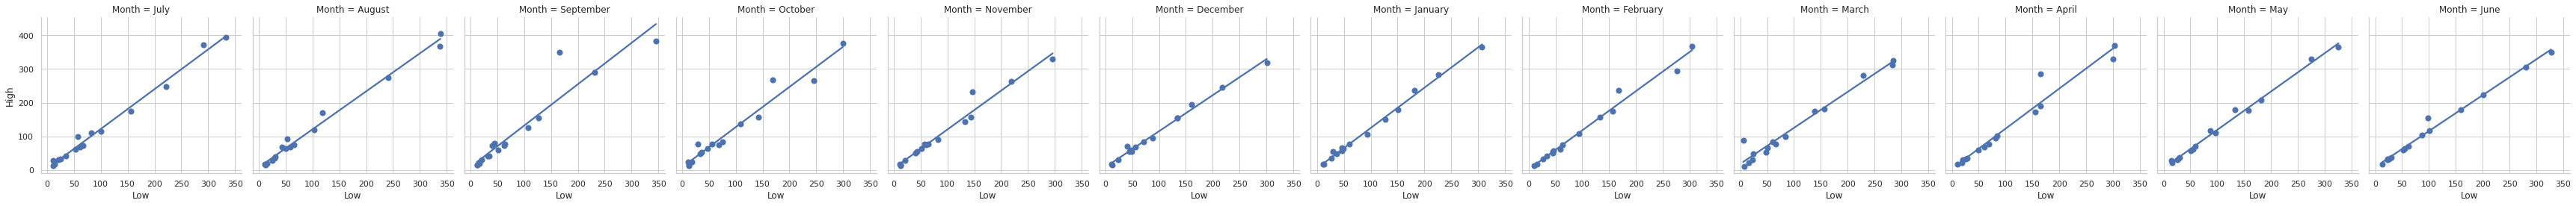

In [174]:
sns.lmplot(x="Low", y="High",col="Month", data=YesBank_df,
           ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

plt.show()



#**Model building**

In [175]:
#storing the independent values in  X variable 

X=YesBank_df.iloc[:,1:4:]

In [176]:
X

Open   High    Low
0    13.00  14.00  11.25
1    12.58  14.88  12.55
2    13.48  14.87  12.27
3    13.20  14.47  12.40
4    13.35  13.88  12.88
..     ...    ...    ...
180  25.60  28.30  11.10
181  12.00  17.16  11.85
182  14.30  15.34  12.75
183  13.30  14.01  12.11
184  12.41  14.90  12.21

[185 rows x 3 columns]

In [177]:
#storing the dependent values in  y variable
 
y=YesBank_df.iloc[:,4]

In [178]:
y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [179]:
##Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [180]:
X_train

Open    High     Low
115  172.50  173.88  156.10
78    47.92   66.50   46.11
36    22.85   30.50   20.40
128  138.80  175.12  138.35
22    30.66   36.14   29.11
..      ...     ...     ...
106   88.80  117.60   86.98
14    18.00   18.88   16.80
92    94.00  100.15   83.42
179   27.75   31.95   25.55
102   74.74   76.35   60.80

[123 rows x 3 columns]

In [181]:
y_train

115    172.55
78      65.99
36      25.45
128    172.91
22      33.51
        ...  
106    113.89
14      18.46
92      85.71
179     25.60
102     61.59
Name: Close, Length: 123, dtype: float64

In [182]:
##standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [183]:
X_train = scaler.fit_transform(X_train)

In [184]:
X_test = scaler.transform(X_test)

In [185]:
X_train

array([[ 0.71985541,  0.58588253,  0.68484704],
       [-0.58591372, -0.45797295, -0.54536406],
       [-0.84868168, -0.80793381, -0.83292409],
       [ 0.36663323,  0.59793674,  0.48631765],
       [-0.76682218, -0.75310661, -0.73550488],
       [ 0.04831401,  0.00825269,  0.06230363],
       [ 0.33319766,  0.40720807,  0.35937069],
       [ 0.53014261,  0.63565475,  0.62187687],
       [-0.89742006, -0.92555954, -0.91121737],
       [-0.81985791, -0.8293203 , -0.9369423 ],
       [ 2.7165565 ,  2.47800426,  2.71230741],
       [-0.94479585, -0.93761375, -0.90920411],
       [-0.65005971, -0.64461874, -0.68528534],
       [-0.18992755, -0.11481688, -0.12794904],
       [-0.9482547 , -0.96949907, -0.91703344],
       [-0.57564198, -0.62906492, -0.79142865],
       [-0.31255958, -0.35327632, -0.33799872],
       [ 1.91640867,  1.87354408,  2.07298687],
       [-0.30836703, -0.29757422, -0.25992914],
       [ 0.06057721, -0.02927089, -0.14673943],
       [-0.88064986, -0.89250768, -0.884

In [186]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [187]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [188]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [189]:
np.mean(mse)

-34.61744111823393

In [190]:
#Prediction 
reg_pred = regression.predict(X_test)

In [191]:
#Creating a datafram to compare Predicted vs Actual values
df_scores_comp = pd.DataFrame({'Actual':y_test, 'Predicted':reg_pred})
df_scores_comp

Actual   Predicted
19    28.63   29.833559
42    12.24   14.686781
156  367.90  378.001206
111  136.83  130.265047
148  306.80  314.411102
..      ...         ...
85    65.97   69.045042
150  354.45  351.349459
26    41.36   39.770518
158  183.45  187.363273
177   27.95   27.109802

[62 rows x 2 columns]

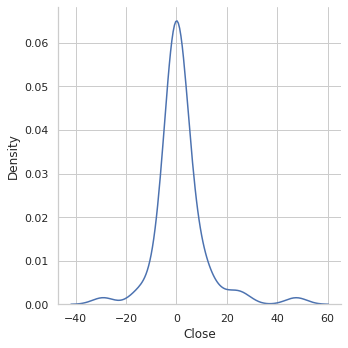

In [192]:
sns.displot(reg_pred-y_test,kind='kde')

##**Conclusion**

#Finding Zscores

In [193]:
YesBank_df['Close_Z_score'] = stats.zscore(YesBank_df['Close'])
YesBank_df['Open_Z_score'] = stats.zscore(YesBank_df['Open'])
YesBank_df['High_Z_score'] = stats.zscore(YesBank_df['High'])
YesBank_df['Low_Z_score'] = stats.zscore(YesBank_df['Low'])

In [194]:
YesBank_df 

Date   Open   High    Low  Close      Month  Year        Day     OC  \
0   2005-07-01  13.00  14.00  11.25  12.46       July  2005     Friday  12.73   
1   2005-08-01  12.58  14.88  12.55  13.42     August  2005     Monday  13.00   
2   2005-09-01  13.48  14.87  12.27  13.30  September  2005   Thursday  13.39   
3   2005-10-01  13.20  14.47  12.40  12.99    October  2005   Saturday  13.10   
4   2005-11-01  13.35  13.88  12.88  13.41   November  2005    Tuesday  13.38   
..         ...    ...    ...    ...    ...        ...   ...        ...    ...   
180 2020-07-01  25.60  28.30  11.10  11.95       July  2020  Wednesday  18.77   
181 2020-08-01  12.00  17.16  11.85  14.37     August  2020   Saturday  13.18   
182 2020-09-01  14.30  15.34  12.75  13.15  September  2020    Tuesday  13.73   
183 2020-10-01  13.30  14.01  12.11  12.42    October  2020   Thursday  12.86   
184 2020-11-01  12.41  14.90  12.21  14.67   November  2020     Sunday  13.54   

        LH  Close_Z_score  Open_Z_score  High_Z_score  Low_Z_score  
0    12.62      -0.943329     -0.938437     -0.962833    -0.920034  
1    13.72      -0.933565     -0.942696     -0.954535    -0.905744  
2    13.57      -0.934786     -0.933570     -0.954629    -0.908822  
3    13.44      -0.937939     -0.936409     -0.958401    -0.907393  
4    13.38      -0.933667     -0.934888     -0.963965    -0.902117  
..     ...            ...           ...           ...          ...  
180  19.70      -0.948517     -0.810664     -0.827986    -0.921683  
181  14.50      -0.923902     -0.948578     -0.933035    -0.913439  
182  14.04      -0.936311     -0.925254     -0.950197    -0.903546  
183  13.06      -0.943736     -0.935395     -0.962739    -0.910581  
184  13.56      -0.920851     -0.944420     -0.954346    -0.909481  

[185 rows x 14 columns]

In [195]:
data = YesBank_df.iloc[:,10:]

In [196]:
Z_scores = pd.DataFrame(data)

In [197]:
Z_scores

Close_Z_score  Open_Z_score  High_Z_score  Low_Z_score
0        -0.943329     -0.938437     -0.962833    -0.920034
1        -0.933565     -0.942696     -0.954535    -0.905744
2        -0.934786     -0.933570     -0.954629    -0.908822
3        -0.937939     -0.936409     -0.958401    -0.907393
4        -0.933667     -0.934888     -0.963965    -0.902117
..             ...           ...           ...          ...
180      -0.948517     -0.810664     -0.827986    -0.921683
181      -0.923902     -0.948578     -0.933035    -0.913439
182      -0.936311     -0.925254     -0.950197    -0.903546
183      -0.943736     -0.935395     -0.962739    -0.910581
184      -0.920851     -0.944420     -0.954346    -0.909481

[185 rows x 4 columns]

In [198]:
YesBank_df.drop(['Close_Z_score','Open_Z_score','High_Z_score','Low_Z_score'], axis=1,inplace=True)

In [199]:
YesBank_df

Date   Open   High    Low  Close      Month  Year        Day     OC  \
0   2005-07-01  13.00  14.00  11.25  12.46       July  2005     Friday  12.73   
1   2005-08-01  12.58  14.88  12.55  13.42     August  2005     Monday  13.00   
2   2005-09-01  13.48  14.87  12.27  13.30  September  2005   Thursday  13.39   
3   2005-10-01  13.20  14.47  12.40  12.99    October  2005   Saturday  13.10   
4   2005-11-01  13.35  13.88  12.88  13.41   November  2005    Tuesday  13.38   
..         ...    ...    ...    ...    ...        ...   ...        ...    ...   
180 2020-07-01  25.60  28.30  11.10  11.95       July  2020  Wednesday  18.77   
181 2020-08-01  12.00  17.16  11.85  14.37     August  2020   Saturday  13.18   
182 2020-09-01  14.30  15.34  12.75  13.15  September  2020    Tuesday  13.73   
183 2020-10-01  13.30  14.01  12.11  12.42    October  2020   Thursday  12.86   
184 2020-11-01  12.41  14.90  12.21  14.67   November  2020     Sunday  13.54   

        LH  
0    12.62  
1    13.72  
2    13.57  
3    13.44  
4    13.38  
..     ...  
180  19.70  
181  14.50  
182  14.04  
183  13.06  
184  13.56  

[185 rows x 10 columns]

In [200]:
Z_scores

Close_Z_score  Open_Z_score  High_Z_score  Low_Z_score
0        -0.943329     -0.938437     -0.962833    -0.920034
1        -0.933565     -0.942696     -0.954535    -0.905744
2        -0.934786     -0.933570     -0.954629    -0.908822
3        -0.937939     -0.936409     -0.958401    -0.907393
4        -0.933667     -0.934888     -0.963965    -0.902117
..             ...           ...           ...          ...
180      -0.948517     -0.810664     -0.827986    -0.921683
181      -0.923902     -0.948578     -0.933035    -0.913439
182      -0.936311     -0.925254     -0.950197    -0.903546
183      -0.943736     -0.935395     -0.962739    -0.910581
184      -0.920851     -0.944420     -0.954346    -0.909481

[185 rows x 4 columns]

# ***Hypothesis Testing***

## Hypothetical Statement - 1

**How it works?**

For Yes bank closing price prediction, let's assume:

Assumptions:

**Test-statistic**: An average closing price for Yes bank is X, i.e., μ (Population) = X.

**Null Hypothesis (H0)**: The average closing price for Yes bank is X.
Alternative Hypothesis (Ha) : The average closing price for Yes bank is different than X.

**Significance Level**: α = 0.05 (generally a low value)

*Sample statistic*: We take a sample of n days of Yes bank closing prices and find that the average closing price is Y.

We perform n experiments, and if probability of getting the sample statistic, given the average closing price is X, for n observations (p-value) is less than 0.05 we Reject the Null Hypothesis and Accept the Alternative Hypothesis, otherwise we do not Reject the Null Hypothesis.
p-value = P( μ (sample) ≠ X | H0 is True ).

### Stating our research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices." 

**Alternative Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices." 

**Defining null hypothesis and alternate hypothesis.**

**H0:** μpredicted - μactual = 0

Where:

**μpredicted** = mean of predicted closing prices\
**μactual** = mean of actual closing prices

The equation form of the alternative hypothesis "The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices" would be:

**H1:** μpredicted - μactual ≠ 0

Where:

μpredicted = mean of predicted closing prices\
μactual = mean of actual closing prices

This is assuming that you are using a t-test, where the null hypothesis is that the means of the two groups (predicted and actual closing prices) are equal and the alternative hypothesis is that they are not equal.

**Significance Value** = 0.05 or 5%

###  Perform Statistical T-Test to obtain P-Value

In [201]:
import scipy.stats as stats
import statistics

In [202]:
#Calculating mean
Closecol = YesBank_df.iloc[:,4:5]
Close_mean = np.mean(Closecol)
Close_mean

Close    105.204703
dtype: float64

In [203]:
#calculating p_value

Close_sample = YesBank_df['Close'].sample(n=10, random_state=1)

In [204]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Close_sample,10)

In [205]:
print(round(p_value,3))

0.07


In [206]:
if p_value > 0.05:
  print("we are accepting null hypothesis")
else:
  print("we are rejecting null hypothesis")
  

we are accepting null hypothesis


conclusion

As the p-value is greater than the significance level i.e 0.07 > 0.05, we accept the null hypothesis and conclude that The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices.

##### Why did you choose the specific statistical test?

In the context of Yes Bank Closing stock price prediction, a t-test can be used to evaluate the performance of a linear regression model, which is a common method used to predict stock prices. The regression model is used to fit a line to the historical data of the stock prices, and the t-test is used to determine whether the slope of the line (coefficient) is significantly different from zero.

The t-test is used to evaluate the significance of the predictor variable in the regression model, and a small p-value (typically < 0.05) indicates that the predictor variable is significantly related to the stock price, and hence it is useful in the model.

## Hypothetical Statement - 2

**Null Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock is not a good fit for the data." 

**Alternative Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock is a good fit for the data." 

Defining null hypothesis and alternate hypothesis.

**H0**: The linear regression model does not fit the data well.

**H1**: The linear regression model fits the data well.

### Perform an appropriate statistical test.

In [207]:
import scipy.stats as stats

In [208]:
#Calculating mean
Opencol = YesBank_df.iloc[:,4:5]
Open_mean = np.mean(Opencol)
Open_mean

Close    105.204703
dtype: float64

In [209]:
#calculating p_value

Open_sample = YesBank_df['Open'].sample(n=10, random_state=1)

In [210]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Open_sample,10)

In [211]:
print(round(p_value,3))

0.057


In [212]:
if p_value > 0.5:
  print(" We accept the Null Hypothesis\n i.e That is The linear regression model does not fit the data well.")
else: 
  print(" We reject the Null Hypothesis\n i.e The linear regression model fits the data well.") 
 

 We reject the Null Hypothesis
 i.e The linear regression model fits the data well.


##### Which statistical test have you done to obtain P-Value?

We used T-test to obtain the P-Value.

##### Why did you choose the specific statistical test?

The main reason to use the Ttest is that, the Dataset we are using to predict the closing price is a continous variable data and t test fits well while working with the  continous variables.

## Hypothetical Statement - 3

### State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power."



**Alternative Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power." 



Defining null hypothesis and alternate hypothesis.

H0: β1 = 0

Where:\
β1 = the coefficient of the independent variable in the linear regression model.

H1: β1 ≠ 0

Where:\
 β1 = the coefficient of the independent variable in the linear regression model



### Perform an appropriate statistical test.

In [213]:
import statsmodels.api as sm

In [214]:
inde = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [215]:
inde

const   Open   High    Low
0      1.0  13.00  14.00  11.25
1      1.0  12.58  14.88  12.55
2      1.0  13.48  14.87  12.27
3      1.0  13.20  14.47  12.40
4      1.0  13.35  13.88  12.88
..     ...    ...    ...    ...
180    1.0  25.60  28.30  11.10
181    1.0  12.00  17.16  11.85
182    1.0  14.30  15.34  12.75
183    1.0  13.30  14.01  12.11
184    1.0  12.41  14.90  12.21

[185 rows x 4 columns]

In [216]:
results = sm.OLS(y, inde).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[12187.05615406]]), p=1.5995940052004147e-208, df_denom=181, df_num=3>


In [217]:
fres = results.f_test(A)
dir(fres)
F_stat_value = fres.fvalue
p_value = fres.pvalue

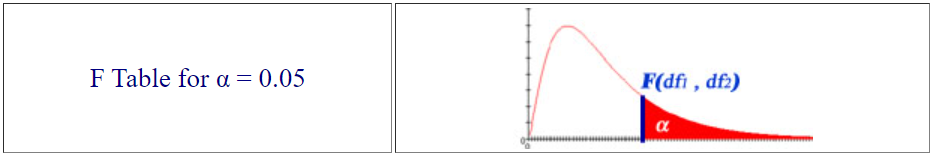\

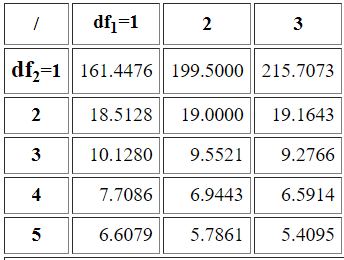\


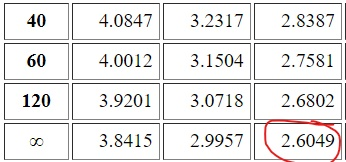


In [218]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          1.60e-208
Time:                        21:37:04   Log-Likelihood:                -619.85
No. Observations:                 185   AIC:                             1248.
Df Residuals:                     181   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3228      0.768      1.723      0.0

In [219]:
if F_stat_value > 2.6049:
   print("we reject the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.")
else:
   print("we accept the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power.")
  

we reject the null hypothesis
The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.


We can also confirm our Hypothesis by considering the p_value as shown below 

In [220]:
if p_value > 0.05:
  print("we accept the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power.")
else:
  print("we reject the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.")
   
  

we reject the null hypothesis
The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.


Conclusion

We get an F-critical value of 2.6049 which is much lower than our F-statistic score of 12187.05615406. Since, F-statistic > F-critical we reject the null hypothesis, and similarly the p_value obtained i.e 1.5995940052004147e-208 which is < the significance value, this would indicate that the independent variable is a significant predictor of the dependent variable, and that the linear regression model has a significant predictive power.

##### Which statistical test have you done to obtain P-Value?

To obtain the P value  we used F-test.

##### Why did you choose the specific statistical test?

The critical value of an F-test is the value of the F-distribution that corresponds to a given level of significance, typically 0.05. If the calculated F-test statistic is greater than the critical value, then the null hypothesis is rejected, and it can be concluded that there is a significant difference in variances between the two or more samples.

In reality, our model is having multiple number of independent variables. This is where F-statistic comes into play.

F-statistic can be used to find the joint significance of multiple independent variables. It’s used to compare two model’s ability to explain the variance of the dependent variable. 


#Model -1 **Linear Regression**

In [221]:
#independent column

X

Open   High    Low
0    13.00  14.00  11.25
1    12.58  14.88  12.55
2    13.48  14.87  12.27
3    13.20  14.47  12.40
4    13.35  13.88  12.88
..     ...    ...    ...
180  25.60  28.30  11.10
181  12.00  17.16  11.85
182  14.30  15.34  12.75
183  13.30  14.01  12.11
184  12.41  14.90  12.21

[185 rows x 3 columns]

In [222]:
#dependent column

y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [223]:
# Data splitting

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print("Shape of X_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)     

Shape of X_train dataset:  (148, 3)
Shape of y_train dataset:  (148,)
Shape of X_test dataset:  (37, 3)
Shape of y_test dataset:  (37,)


In [224]:
linear= LinearRegression()
lr_model=linear.fit(x_train, y_train) # Fitting the Algorithm

linear.score(x_train, y_train)
print("Train score :", linear.score(x_train, y_train))
linear.score(x_test, y_test)
print("Test score :", linear.score(x_test, y_test))
linear.coef_
print("Coefficient :", linear.coef_)


y_pred_train=linear.predict(x_train) # predicted test
y_pred_test=linear.predict(x_test) # predicted test

Train score : 0.9943947124704909
Test score : 0.9978412541225983
Coefficient : [-0.49613547  0.52549199  0.99944007]


In [225]:
# actual vs predicated value comparioins
actual_vs_predict=pd.DataFrame({"actual":y_test,"prediction": y_pred_test})
actual_vs_predict

actual  prediction
16    25.32   26.526461
179   25.60   30.046979
66    52.59   52.995070
40    12.26   14.749190
166  147.95  147.010003
155  339.60  339.975885
97    48.65   47.574046
177   27.95   26.715619
35    22.85   25.538912
54    49.84   51.548551
116  163.31  167.116841
56    50.97   52.404928
4     13.41   15.032784
149  315.05  317.190361
81    70.07   74.025326
31    49.42   48.982145
47    29.68   28.107920
126  149.38  134.700379
106  113.89  106.161901
105   88.14   90.753057
48    31.93   28.995763
11    15.62   15.521460
108  108.21  108.225180
78    65.99   58.744163
117  167.96  165.967211
14    18.46   19.271019
42    12.24   15.019721
29    49.81   51.820260
19    28.63   30.422317
82    66.02   62.473166
164  275.05  261.588979
154  346.20  338.473732
102   61.59   65.295680
136  234.28  232.009606
93   100.28   95.849135
53    53.41   54.023516
132  243.44  242.484516

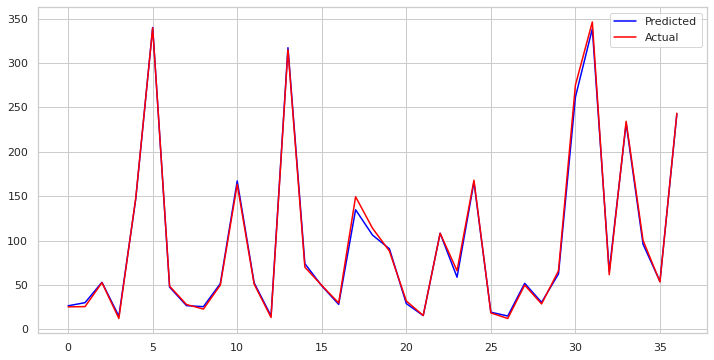

In [256]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_test), color="blue")
plt.plot(np.array((y_test)),color="red")
plt.legend(["Predicted","Actual"])
plt.show()

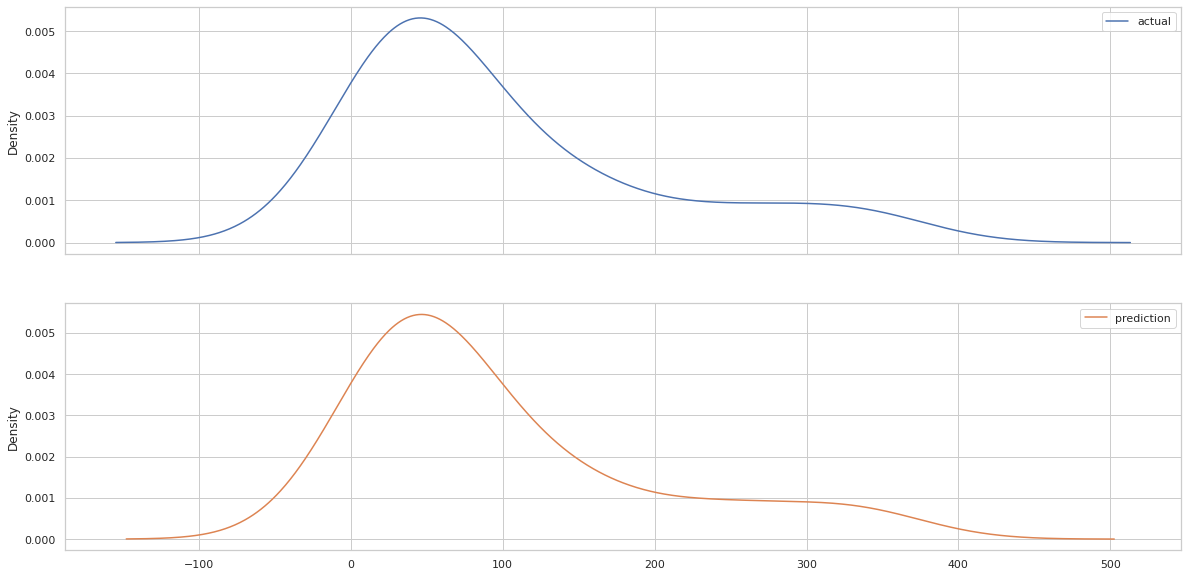

In [227]:
actual_vs_predict.plot(kind="kde",figsize=(20,10), subplots= "True")
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.


In [228]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [229]:
linear_mse= mean_squared_error((y_train), (y_pred_train))
print("MSE :",linear_mse)
linear_RMSE=np.sqrt(linear_mse)
print("RMSE :",linear_RMSE)
linear_mae= mean_absolute_error(y_train, y_pred_train)
print("MAE :",linear_mae)
linear_r2= r2_score(y_train, y_pred_train)
print("R2 :",linear_r2)
linear_Adjusted_R2= 1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",linear_Adjusted_R2)

MSE : 54.69075212224617
RMSE : 7.395319609201902
MAE : 4.473587918023093
R2 : 0.9943947124704909
Adjusted R2 : 0.9938851408768992


###2. Cross- Validation & Hyperparameter Tuning

In [230]:
# Hyperparameter tunning
parameter={'fit_intercept':[True,False], 'copy_X':[True,False], 'n_jobs':[1,2,3,4,5,6,7,8,9,10,11,12], 'positive':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_linear=GridSearchCV(linear,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_linear.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [231]:
# Getting R2 score
y_pred_rsc=rsc_linear.predict(x_test)
r2_score(y_pred_rsc,y_test)

0.9977951806872736

Used GridSearchCV to automate the tweaking of hyperparameters because doing it manually may take a lot of time and resources.

Findings:

*   R2(coefficient of determination) regression score function is 0.9938, using Evaluation metrics score chart.
*   After using cross validation hyperparameter i.e GridSearchCV, we got R2 score i.e. (coefficient of determination) regression score function is 0.9977




# Model - 2 **Lasso Regressor**

In [232]:
from sklearn.linear_model import Lasso

In [233]:
# Data splitting
p=YesBank_df.iloc[:,1:3] 
q=YesBank_df[["Close"]] 

p_train, p_test, q_train, q_test = train_test_split(p,q, test_size=0.2, random_state=1)
print("Shape of p_train dataset : ", p_train.shape)
print("Shape of q_train dataset : ", q_train.shape)
print("Shape of p_test dataset : ", p_test.shape)
print("Shape of q_test dataset : ", q_test.shape)

Shape of p_train dataset :  (148, 2)
Shape of q_train dataset :  (148, 1)
Shape of p_test dataset :  (37, 2)
Shape of q_test dataset :  (37, 1)


In [234]:
# Implementing Model

lasso = Lasso(alpha=0.01, max_iter=3000)
lasso.fit(p_train, q_train)  # Fitting the Algorithm

lasso.score(p_test, q_test)
print("Test score :", lasso.score(p_test, q_test))
lasso.score(p_train, q_train)
print("Train score :", lasso.score(p_train, q_train))
lasso.coef_
print("Coefficient :", lasso.coef_)    

q_pred_test_lasso=lasso.predict(p_test)   # predicted test
q_pred_train_lasso=lasso.predict(p_train)   # predicted test

Test score : 0.9891482752865322
Train score : 0.9655591029131632
Coefficient : [-0.05006089  0.94821501]


In [235]:
# Actual value and Predicated value
ab=q_test
ac=pd.DataFrame(q_pred_test_lasso.reshape(-1,1))
print("actual value") 
print(ab)
print("Predicted value") 
print(ac)

actual value
      Close
16    25.32
179   25.60
66    52.59
40    12.26
166  147.95
155  339.60
97    48.65
177   27.95
35    22.85
54    49.84
116  163.31
56    50.97
4     13.41
149  315.05
81    70.07
31    49.42
47    29.68
126  149.38
106  113.89
105   88.14
48    31.93
11    15.62
108  108.21
78    65.99
117  167.96
14    18.46
42    12.24
29    49.81
19    28.63
82    66.02
164  275.05
154  346.20
102   61.59
136  234.28
93   100.28
53    53.41
132  243.44
Predicted value
             0
0    25.509742
1    28.561728
2    56.752195
3    15.793275
4   160.310187
5   314.204333
6    60.649890
7    27.412238
8    28.644035
9    51.570405
10  163.479936
11   46.626611
12   12.148360
13  286.757331
14   68.129128
15   48.283514
16   27.844412
17  134.534049
18  106.720126
19   85.539329
20   29.611450
21   16.191497
22  102.760036
23   60.312829
24  155.357089
25   16.656652
26   16.280781
27   48.536234
28   29.055419
29   63.065659
30  254.644045
31  327.020404
32   68.310113
33  2

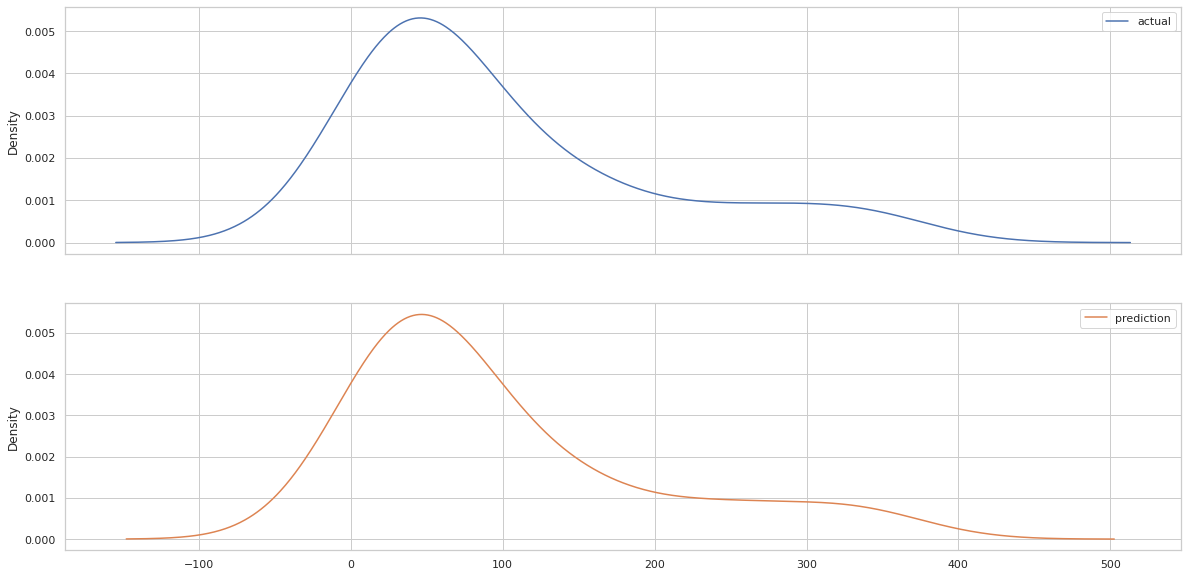

In [236]:
# Actual Value vs predicted value visualization
actual_vs_predict.plot(kind="kde",figsize=(20,10),subplots=True)
plt.show()

Actual Value vs Predicted value 


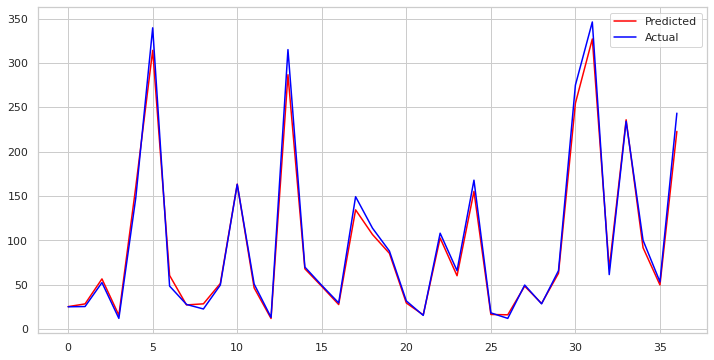

In [257]:
print("Actual Value vs Predicted value ")
plt.figure(figsize=(12,6))
plt.plot((q_pred_test_lasso), color="red")
plt.plot(np.array((q_test)),color="blue")
plt.legend(["Predicted","Actual"])
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [238]:
#Evaluating predictions

lasso_mse= mean_squared_error((q_train), (q_pred_train_lasso))
print("MSE :",lasso_mse)
lasso_RMSE=np.sqrt(lasso_mse)
print("RMSE :",lasso_RMSE)
MAE_l= mean_absolute_error(q_train, q_pred_train_lasso)
print("MAE :",MAE_l)
lasso_r2= r2_score(q_train, q_pred_train_lasso)
print("R2 :",lasso_r2)
lasso_adjusted_r2 = 1-(1-r2_score(q_train, q_pred_train_lasso))*((p_test.shape[0]-1)/(p_test.shape[0]-p_test.shape[1]-1))
print("Adjusted R2 :",lasso_adjusted_r2)


MSE : 336.0395975278305
RMSE : 18.331382859125235
MAE : 9.549745224909854
R2 : 0.9655591029131632
Adjusted R2 : 0.9635331677904081


###2. Cross- Validation & Hyperparameter Tuning

In [239]:
print(lasso.get_params().keys())

# Hyperparameter tunning
parameter={'alpha':[1.1,2.5,5.6,6.8,9.7], 'fit_intercept':[True,False], 'selection':['cyclic', 'random'], 'copy_X':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_lasso=GridSearchCV(lasso,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_lasso.fit(p_train,q_train)


dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


GridSearchCV(cv=5, estimator=Lasso(alpha=0.01, max_iter=3000),
             param_grid={'alpha': [1.1, 2.5, 5.6, 6.8, 9.7],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_absolute_error')

In [240]:
# Predicting on the model
q_pred_rsc_lasso=rsc_lasso.predict(p_test)
r2_score(q_pred_rsc_lasso,q_test)

0.9873719618354572

**Findings:**


*   R2(coefficient of determination) regression score function is 0.98, using Evaluation metrics score chart.


*   After using cross validation hyperparameter i.e GridSearchCV again, we got R2 score i.e. (coefficient of determination) regression score function is 0.99

R2 Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s) as our data set R2 score is 0.99
which means the predicted values are the nearly same as the actual values.\
which means the predicted values are the nearly same as the actual values.


# Model - 3 **Ridge Regression** 

In [241]:
from sklearn.linear_model import Ridge

In [242]:
# Model Implementation
ridge= Ridge(alpha=0.01)
ridge_model=ridge.fit(x_train,y_train) # Fitting the Algorithm

ridge.score(x_train, y_train)

ridge.coef_
print("Coefficient :", ridge.coef_)

# Predicting on the model
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

Coefficient : [-0.49613491  0.52549167  0.99943983]


In [243]:
# actual vs predicated value comparision using lasso model
actual_vs_predict_ridge=pd.DataFrame({"actual":y_test,"prediction": y_pred_test_ridge})
actual_vs_predict_ridge

actual  prediction
16    25.32   26.526460
179   25.60   30.046979
66    52.59   52.995074
40    12.26   14.749191
166  147.95  147.010007
155  339.60  339.975891
97    48.65   47.574052
177   27.95   26.715618
35    22.85   25.538915
54    49.84   51.548552
116  163.31  167.116844
56    50.97   52.404928
4     13.41   15.032784
149  315.05  317.190361
81    70.07   74.025327
31    49.42   48.982146
47    29.68   28.107920
126  149.38  134.700383
106  113.89  106.161893
105   88.14   90.753055
48    31.93   28.995764
11    15.62   15.521461
108  108.21  108.225181
78    65.99   58.744158
117  167.96  165.967211
14    18.46   19.271020
42    12.24   15.019721
29    49.81   51.820259
19    28.63   30.422318
82    66.02   62.473170
164  275.05  261.588967
154  346.20  338.473743
102   61.59   65.295684
136  234.28  232.009613
93   100.28   95.849132
53    53.41   54.023516
132  243.44  242.484510

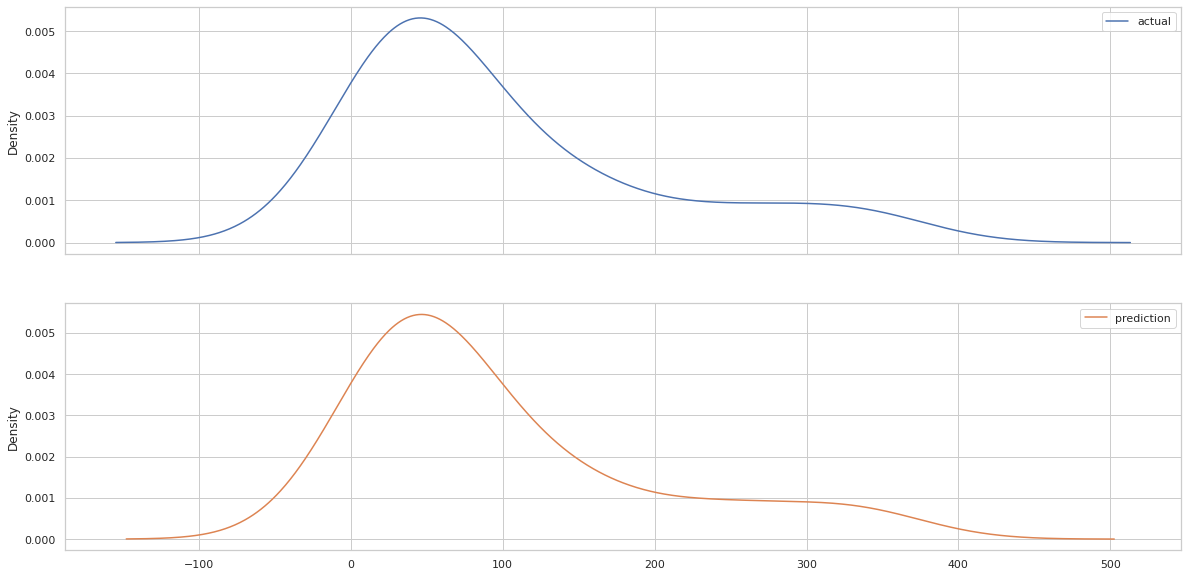

In [244]:
actual_vs_predict_ridge.plot(kind="kde",figsize=(20,10), subplots= "True")
plt.show()

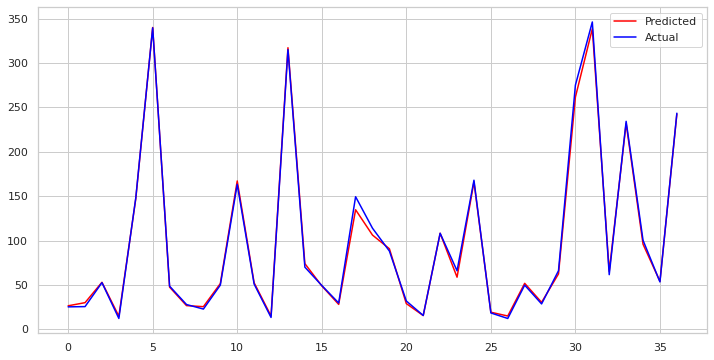

In [258]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_test_ridge), color="red")
plt.plot(np.array((y_test)),color="blue")
plt.legend(["Predicted","Actual"])
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [246]:
#Evaluating predictions

ridge_mse= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",ridge_mse)
ridge_RMSE=np.sqrt(ridge_mse)
print("RMSE :",ridge_RMSE)
ridge_mae= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",ridge_mae)
ridge_r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",ridge_r2)
ridge_Adjusted_R2= 1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",ridge_Adjusted_R2)

MSE : 54.69075212229255
RMSE : 7.395319609205037
MAE : 4.473587918229427
R2 : 0.9943947124704862
Adjusted R2 : 0.993885140876894


In [247]:
print(ridge.get_params().keys())

# Hyperparameter tunning
parameter={'max_iter':[1000,20000,50000,40000,130000,20000,8000], 'fit_intercept':[True,False], 'solver':['auto', 'svd','cholesky'], 'copy_X':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_ridge=GridSearchCV(ridge,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_ridge.fit(x_train,y_train)

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])


GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 20000, 50000, 40000, 130000, 20000,
                                      8000],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='neg_mean_absolute_error')

In [248]:
# Predicting on the model
y_pred_rsc_ridge=rsc_ridge.predict(x_test)
r2_score(y_pred_rsc_ridge,y_test)

0.9977951799009848

**Findings:**


*   R2(coefficient of determination) regression score function is 0.9938, using Evaluation metrics score chart.

*   After using cross validation hyperparameter i.e GridSearchCV, we got R2 score i.e. (coefficient of determination) regression score function is 0.9977



#**Understanding model and feature importance using LIME**

In [249]:
!pip install lime
from lime import lime_tabular 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4d515b2e8a9a28e72aedd4255ad3a4b9f4dce6d82fd95f239464fc26f63522d5
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [250]:
explainer=lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),
                                            mode='regression',
                                            feature_names=['Close','Open','High'],
                                            kernel_width=4,
                                            verbose=True,
                                            discretize_continuous=True,
                                            sample_around_instance=True,
                                            random_state=20,
                                      
                                            categorical_features=[1,2,3])

In [251]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=lasso,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept 90.46679187255367
Prediction_local [60.6361299]
Right: 14.749190153316698


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [252]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=linear,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept 93.77379249823485
Prediction_local [14.74919015]
Right: 14.749190153316698


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [253]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=ridge,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept -10202.091167078737
Prediction_local [-738.03370964]
Right: -767.4398823984793


In [254]:
exp.as_map()

{0: [(0, -10975.66770682256),
  (1, 2940.6172760928116),
  (2, -1429.0070267113608)],
 1: [(0, 10975.66770682256),
  (1, -2940.6172760928116),
  (2, 1429.0070267113608)]}

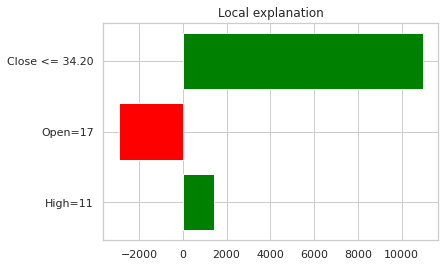

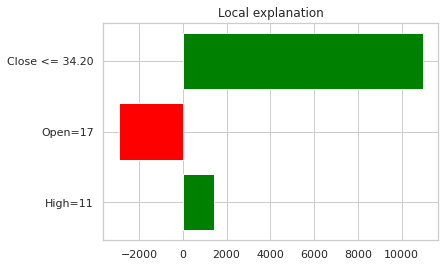

In [255]:
exp.as_pyplot_figure(label=4)